In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
haberman = pd.read_csv('haberman.csv')


# Number of points and features.

In [ ]:
haberman.shape

(306, 4)

# Number of columns

In [ ]:
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

# Number of data-points per class

In [ ]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Observation: This haberman.csv dataset seems an imbalanced dataset which has unequal data-points in 2 class of survivors where '1' is for survivors and '2' is for non-survivors.

# Objective of this EDA
To identify and predict whher the patient will survive with the given treatment or not by oberseving the dependency on other factors from the dataset.

# Bi-variate Analysis

# 2-D scatter plot

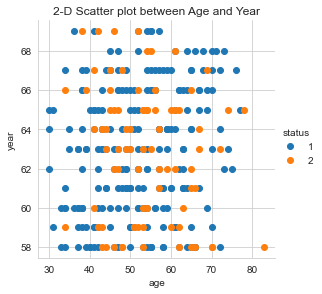

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='status', size=4)\
   .map(plt.scatter, 'age', 'year')\
   .add_legend()
plt.title('2-D Scatter plot between Age and Year')
plt.show()

Observation:
Around 90-95% of data points are overlapping which makes the interpretation nearly impossible.

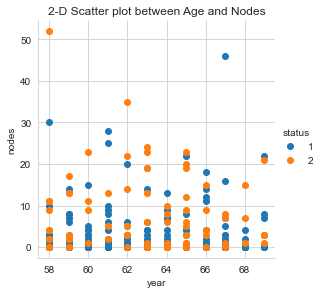

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='status', size=4)\
   .map(plt.scatter, 'year', 'nodes')\
   .add_legend()
plt.title('2-D Scatter plot between Age and Nodes')
plt.show()

Observation: From the above plot nothing of much significance can be derived out.

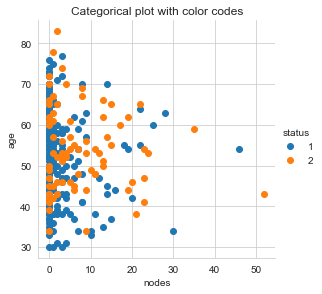

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='status', size=4)\
   .map(plt.scatter, 'nodes', 'age')\
   .add_legend()
plt.title('Categorical plot with color codes')
plt.show()

Observation: This dataset also didn't help much in serving our objectve as the plot is very much overlapping over almost every data point.


# Pair plot

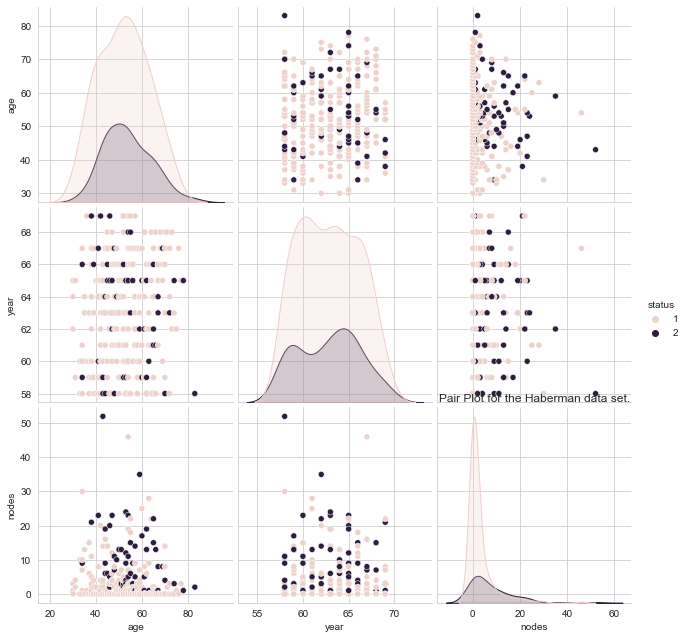

In [ ]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman, hue='status', size=3)
plt.title('Pair Plot for the Haberman data set.')
plt.show()

Observations:
1) In all the plots it is very difficult to differentiate the survivors from non survivors.

2) However, in the last plot it seems that people having 0 nodes are more likely to become survivors.

# Univariate Analysis


# 1) PDF

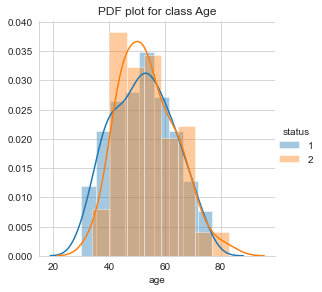

In [ ]:
sns.FacetGrid(haberman, hue='status', size=4).map(sns.distplot, 'age').add_legend()
plt.title('PDF plot for class Age')
plt.show()

Observations:

1)This histogram for people surviving in respect of age is more of type overlapping.

2)Out of people in the age range of 20 to 40 years maximum survived.

3)While people in age range of 40-60 seems more likely to be non-survivors.

4)And, people in the range of 60-80 years age are less likely to survive as compared to those of 40-60 years' age range.

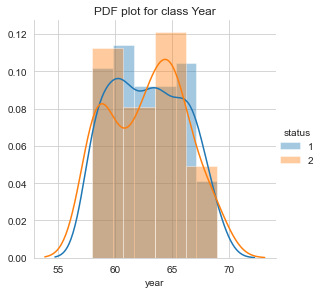

In [ ]:
sns.FacetGrid(haberman, hue='status', size=4).map(sns.distplot, 'year').add_legend()
plt.title('PDF plot for class Year')
plt.show()

Observations:
1) This historam plot shows that nearly 90-95% of data is overlapping.

2) From 1958 to 1960 years of surgery, number of survivors increased and reached maximum in 1960 leaving number of non-survivors at minimum.

3) Maximum number of deaths after surgery having surgery has been recorded in 1965.

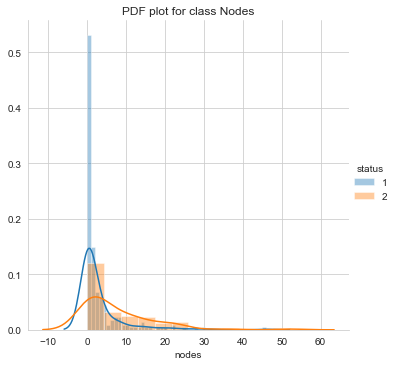

In [ ]:
sns.FacetGrid(haberman, hue='status', size=5).map(sns.distplot, 'nodes').add_legend();
plt.title('PDF plot for class Nodes')
plt.show()

Observations:
1)Above plot shows that people having 0 to 3 nodes are going to have highest chances of surviving.
2)Lesser the number of nodes better are the chances of survival.
3)There is a pattern also there in which after increment of 4 nodes everytime there is a decrease in number of deaths.For e.g. the number of deaths is max in node range 1 to 4 which decreased around 70% in 5 to 8.

# 2) CDF

In [ ]:
haberman_1=haberman.loc[haberman['status']==1]
haberman_2=haberman.loc[haberman['status']==2]

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]


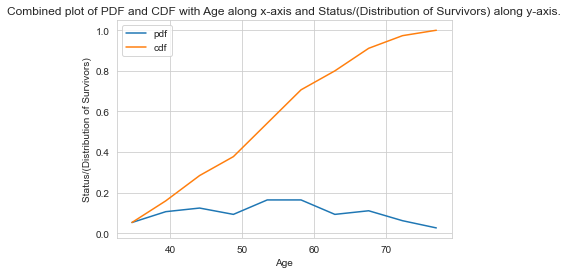

In [ ]:
# Plot for survivors i.e. haberman_1 according to 'age'
counts, bin_edges=np.histogram(haberman_1['age'], bins=10, density=True)

pdf=counts/sum(counts)
print(pdf)
cdf=np.cumsum(pdf)
plt.title('Combined plot of PDF and CDF with Age along x-axis and Status/(Distribution of Survivors) along y-axis.')
plt.plot(bin_edges[1:], pdf , label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.xlabel('Age')
plt.ylabel('Status/(Distribution of Survivors)')
plt.legend()
plt.show()

Observations: 1) Highest probability of survival of a patient is in the age range 53-57 years.
              2) 15% of people lie in the age range of 53-57 years.
              3)


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]


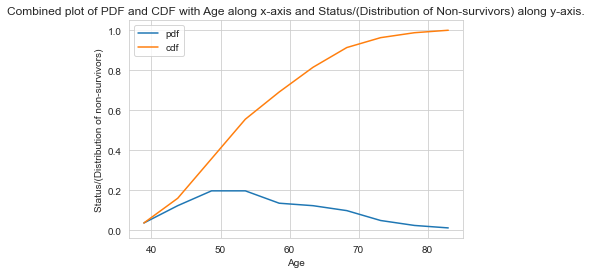

In [ ]:
# Plot for non-survivors i.e. haberman_2 according to 'age'
counts, bin_edges=np.histogram(haberman_2['age'], bins=10, density=True)

pdf=counts/sum(counts)
print(pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf , label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.title('Combined plot of PDF and CDF with Age along x-axis and Status/(Distribution of Non-survivors) along y-axis.')
plt.xlabel('Age')
plt.ylabel('Status/(Distribution of non-survivors)')
plt.legend()
plt.show()

Observations:
1) The percentage of people died in the age range of 48-55 years is more than that of 55-68 years which is followed by the people died in the age range of 68 to 80 years.

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]


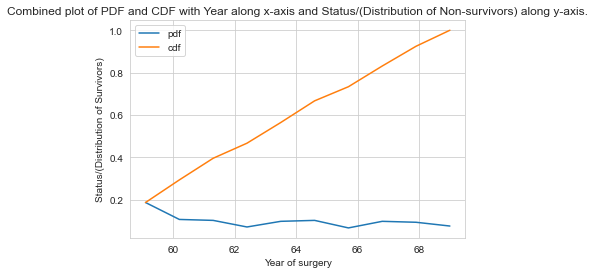

In [ ]:
# Plot for survivors i.e. haberman_1 according to 'year'
counts, bin_edges=np.histogram(haberman_1['year'], bins=10, density=True)

pdf=counts/sum(counts)
print(pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf , label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.title('Combined plot of PDF and CDF with Year along x-axis and Status/(Distribution of Survivors) along y-axis.')
plt.xlabel('Year of surgery')
plt.ylabel('Status/(Distribution of Survivors)')
plt.legend()
plt.show()

Observations:
1) In this plot graph is quite linear in nature.
2) Nearly 60% of people took operations in or before 1964 and survived.

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]


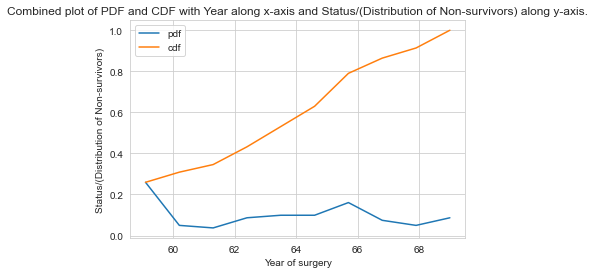

In [ ]:
# Plot for non-survivors i.e. haberman_2 according to 'nodes'
counts, bin_edges=np.histogram(haberman_2['year'], bins=10, density=True)

pdf=counts/sum(counts)
print(pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf , label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.title('Combined plot of PDF and CDF with Year of Surgery along x-axis and Status/(Distribution of Non-survivors) along y-axis.')
plt.xlabel('Year of Surgery')
plt.ylabel('Status/(Distribution of Non-survivors)')
plt.legend()
plt.show()

Observations:
1) Around 20% people who died had their operation between 1964 and 1966.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]


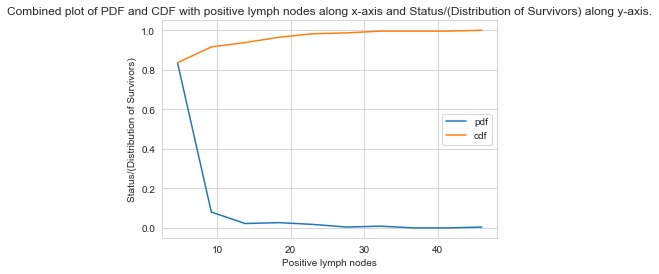

In [ ]:
# Plot for survivors i.e. haberman_1 according to 'nodes'
counts, bin_edges=np.histogram(haberman_1['nodes'], bins=10, density=True)

pdf=counts/sum(counts)
print(pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf , label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.title('Combined plot of PDF and CDF with positive lymph nodes along x-axis and Status/(Distribution of Survivors) along y-axis.')
plt.xlabel('Positive lymph nodes')
plt.ylabel('Status/(Distribution of Survivors)')
plt.legend()
plt.show()

Observations:
1) More than 92% of the survivors had less than or equal to 8 nodes
2) While percentage of survivors having nodes more than 10 is least and keeps on decreasing with increasing number of nodes.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]


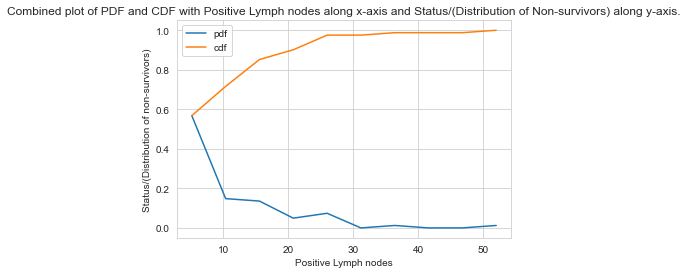

In [ ]:
# Plot for non-survivors i.e. haberman_2 according to 'nodes'
counts, bin_edges=np.histogram(haberman_2['nodes'], bins=10, density=True)

pdf=counts/sum(counts)
print(pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf , label='pdf')
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.title('Combined plot of PDF and CDF with Positive Lymph nodes along x-axis and Status/(Distribution of Non-survivors) along y-axis.')
plt.xlabel('Positive Lymph nodes')
plt.ylabel('Status/(Distribution of non-survivors)')
plt.legend()
plt.show()

Observations:
1) Here it can be observed that about 97% of patients who died had nodes less than or equal to 28.

# Box Plot

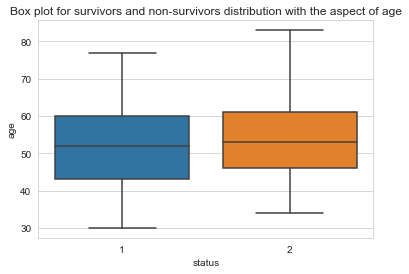

In [ ]:
sns.boxplot(x='status', y='age', data=haberman)
plt.title('Box plot for survivors and non-survivors distribution with the aspect of age')
plt.ylabel('Age')
plt.xlabel('Distribution of survivors and non-survivors)')
# plt.legend(){here it is showing no attributes for filling in legend, I also checked cheatsheet but didn't find anything helpful}
plt.show()

Observation:
1) Aound 90% of data points are overlapping for both who survived and died.
Hence, drawing any is nearly impossible from this plot.

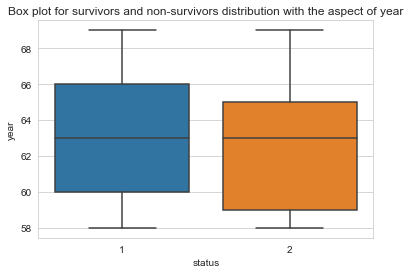

In [ ]:
sns.boxplot(x='status', y='year', data=haberman)
plt.title('Box plot for survivors and non-survivors distribution with the aspect of year')
plt.ylabel('Year')
plt.xlabel('Distribution of survivors and non-survivors)')
plt.show()

Observation:
1) In this plot too along with 80% of data points medians of both classes are overlapping.
Hence, drawing any conclusions from this plot too doesn't seem possible.

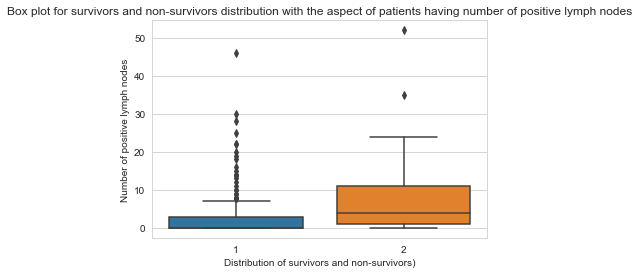

In [ ]:
sns.boxplot(x='status', y='nodes', data=haberman)
plt.title('Box plot for survivors and non-survivors distribution with the aspect of patients having number of positive lymph nodes')
plt.ylabel('Number of positive lymph nodes')
plt.xlabel('Distribution of survivors and non-survivors)')
plt.show()

Observations:
1) This plot clearly shows that around 50% of the survivors had less than or equal to nodes 3 in number.
2) Also majority of non-survivors have nodes more than 5 in number.

# Violin Plots

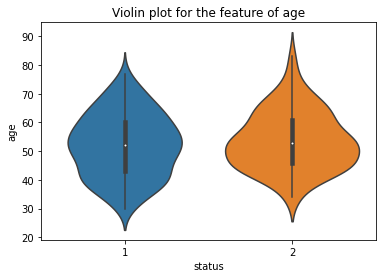

In [ ]:
#For age
import seaborn as sns
sns.violinplot(x='status', y='age', data=haberman)
plt.title('Violin plot for the feature of age')
plt.show()

Observations:
1) This plot shows extreme overlapping of data points i.e. around 95%.
Hence, deriving conclusions is not possible with age in Violin plot.

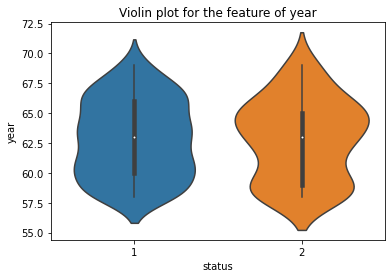

In [ ]:
sns.violinplot(x='status', y='year', data=haberman)
plt.title('Violin plot for the feature of year')
plt.show()

Observations:
1) This plot also shows around 90% of overlapping which makes any interpretation extremely difficult.

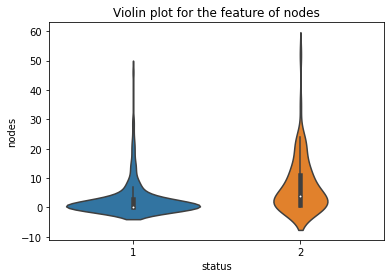

In [ ]:
sns.violinplot(x='status', y='nodes', data=haberman)
plt.title('Violin plot for the feature of nodes')
plt.show()

Observations:

1.   Most of the survivors had nodes equal to 0.
2.   People who had nodes in equal to near 20 or less more likely died.

Overall Conclusions:
1.   Finding probability of survival of patient based on year of surgery and age may result in lots of errors.
2.   The most suitable and accurate data to derive conclusions to be depended upon is the number of positive lymph nodes a patient has.
1.   Based all the observations of all 3 plots(pdf & cdf, box plot and violin plot), it can be concluded that:
    * Probability of patient surviving is 82.03% when they have number of positive lymph nodes between 0 and 3.
    * 70.2% of patients have positive lymph nodes in the range 0 to 3.
    * 58.17% of survivors had 0 to 3 positive lymph nodes.